<a href="https://colab.research.google.com/github/aghakishiyeva/Interpretable-ML-II/blob/main/AIPI590_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in? Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/aghakishiyeva/Interpretable-ML-II/blob/main/AIPI590_Assignment_4.ipynb)

*This notebook implements models with the help of the [imodels GitHub repository](https://github.com/csinva/imodels?tab=readme-ov-file), specifically **RuleFit**, **SkopeRules**, and **OneR** classifiers.*


# Installing and Importing Libraries

We install and import all the necessary libraries, including `numpy`, `matplotlib`, `pandas`, `seaborn`, and `sklearn` for data loading, processing, and visualization. Additionally, we import `RuleFitClassifier`, `SkopeRulesClassifier`, `SlipperClassifier` from the `imodels` library, which we'll use to train our model.

In [ ]:
pip install numpy matplotlib pandas seaborn scikit-learn imodels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imodels import RuleFitClassifier, SkopeRulesClassifier, OneRClassifier

import warnings
warnings.filterwarnings('ignore')

# Loading and Preprocessing The Dataset

We load the Breast Cancer dataset from `sklearn.datasets`. The dataset contains 30 features representing various characteristics of the breast cancer cells, and a binary target variable indicating whether the cancer is benign (0) or malignant (1).

We then split the dataset into three subsets:
- **Training set (64%)**
- **Validation set (16%)**
- **Test set (20%)**

We use the `train_test_split` function twice: first to create the test set, and then to split the remaining data into training and validation sets.

In [ ]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# First, split the data into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, split the train+validation set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

Since the dataset contains features with different scales, we use `StandardScaler` to standardize the feature values to have a mean of 0 and a standard deviation of 1. This helps the model converge faster and prevents certain features from dominating due to larger magnitude.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (364, 30)
Validation data shape: (91, 30)
Test data shape: (114, 30)


# RuleFit

**RuleFit combines the power of linear models and decision trees. It extracts decision rules from an ensemble of decision trees (like random forest) and fits a sparse linear model on these rules. The resulting model is interpretable because it selects a small number of decision rules that help explain the target variable. RuleFit is powerful in balancing interpretability and prediction performance.**

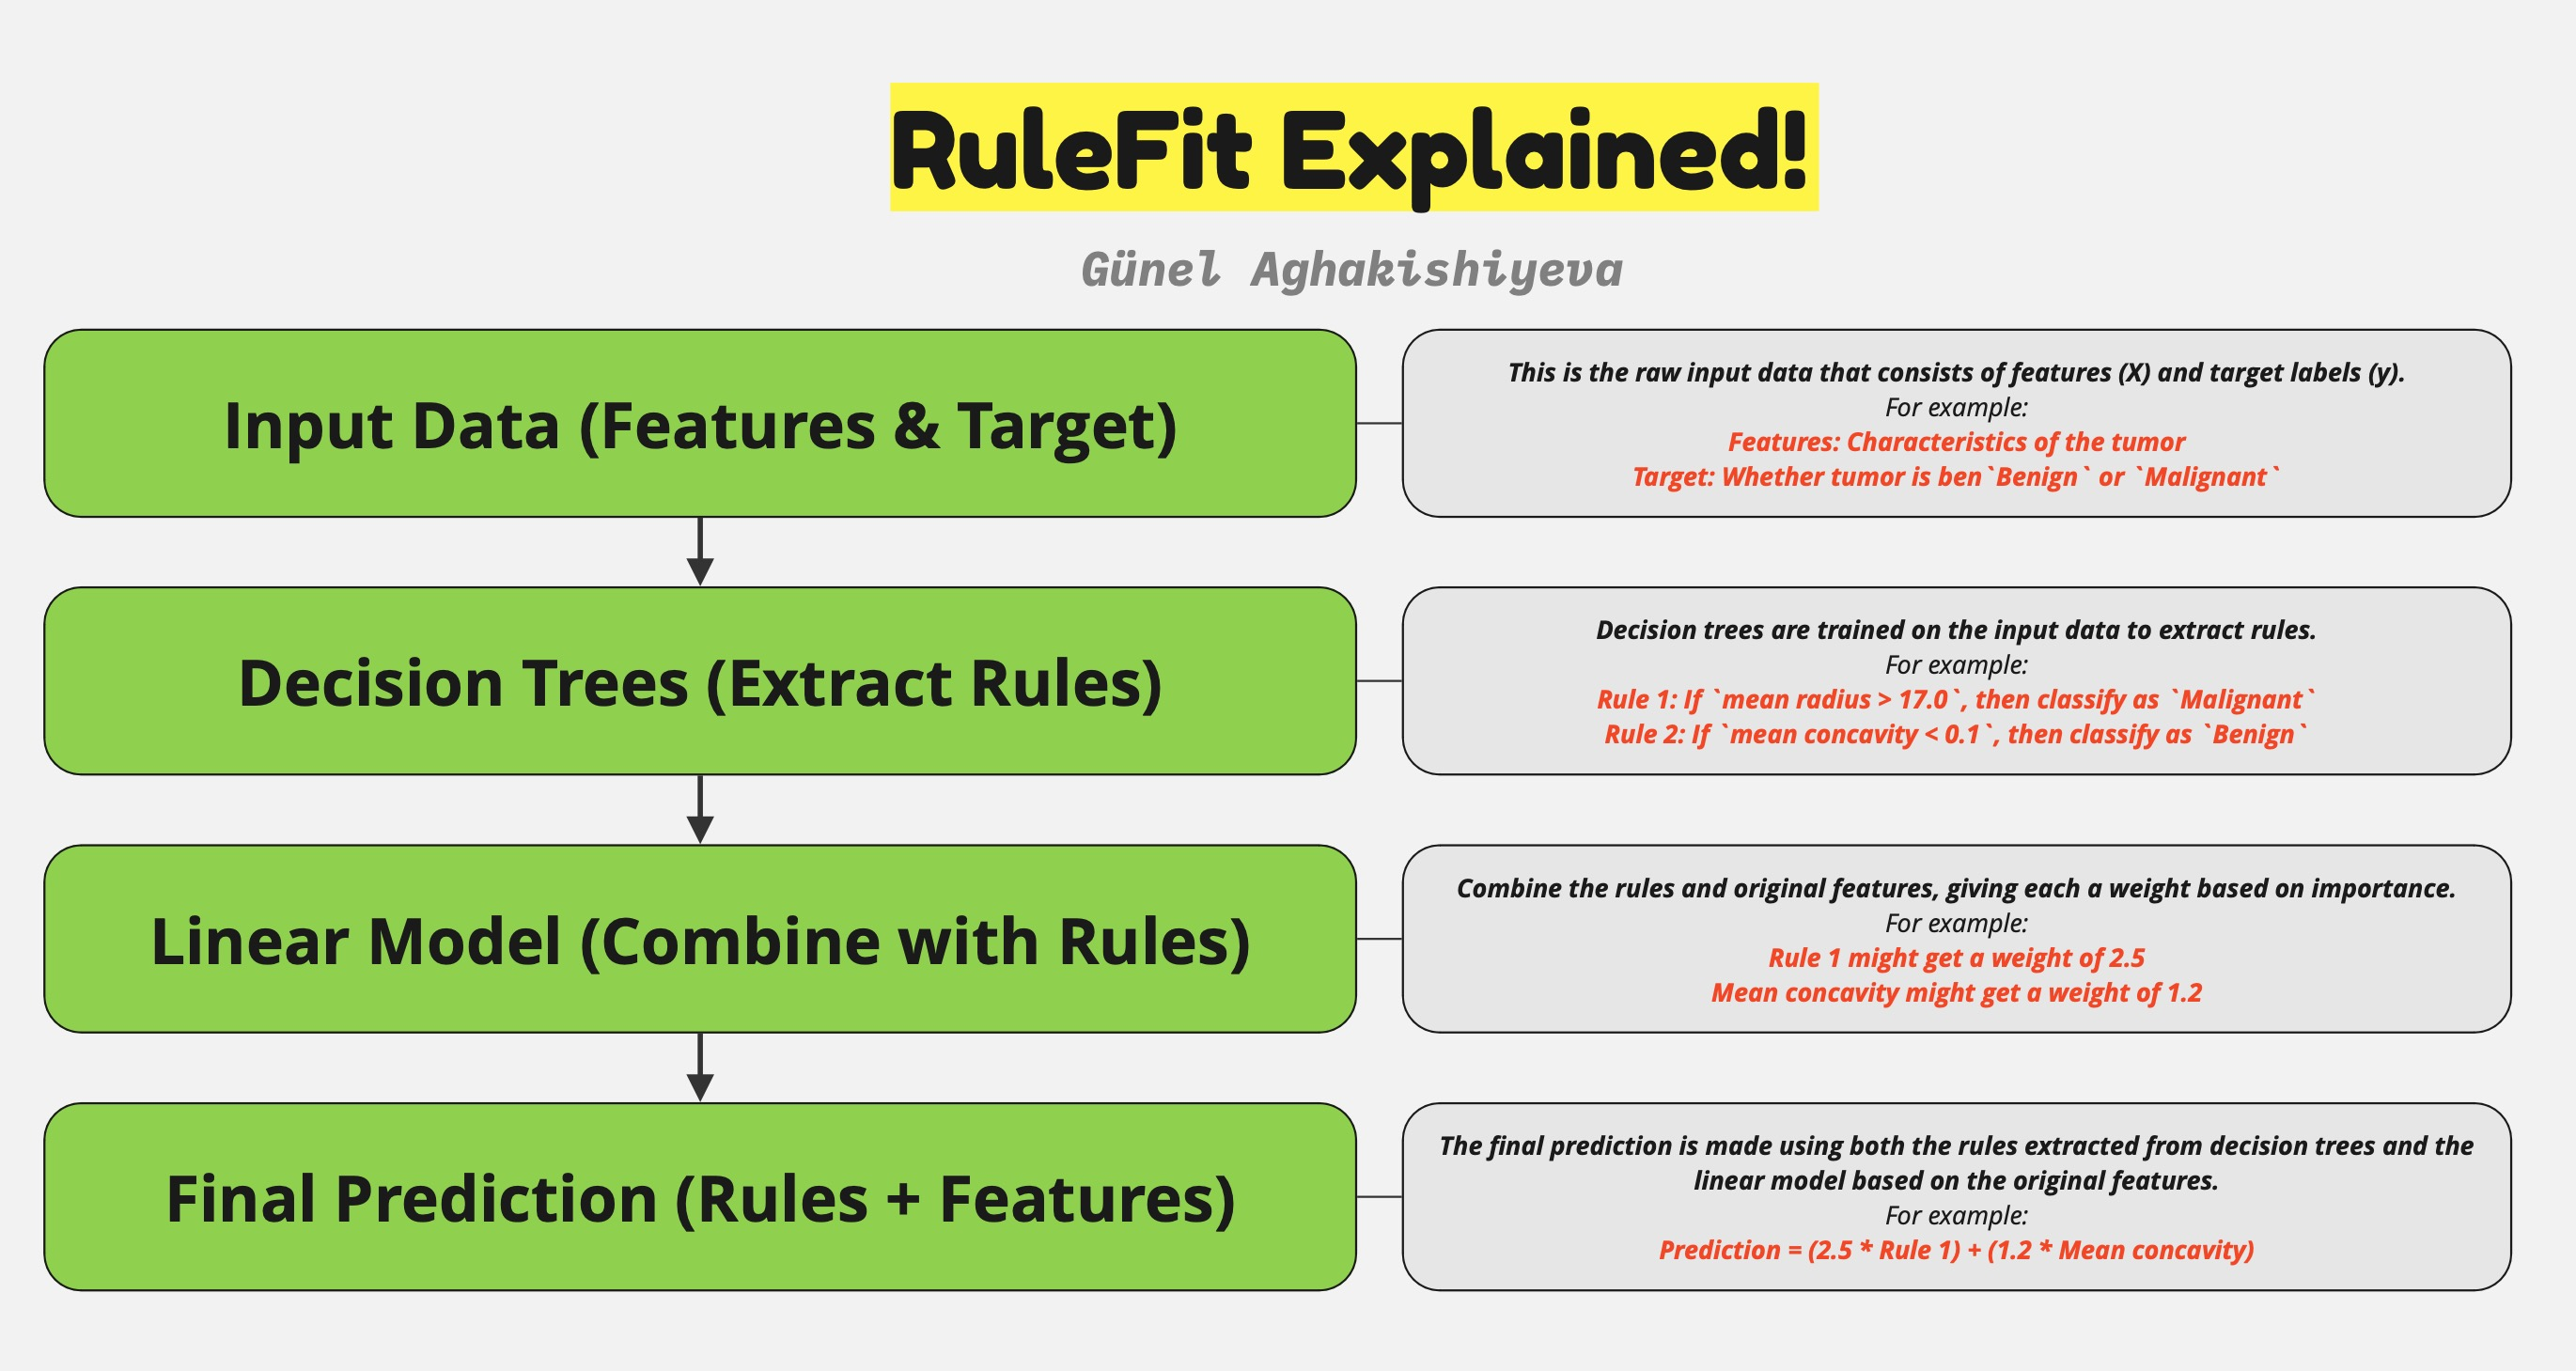

Here, we instantiate the `RuleFitClassifier` model and fit it to the training data.

In [ ]:
# Instantiate and fit the RuleFitClassifier model
rulefit_model = RuleFitClassifier()
rulefit_model.fit(X_train, y_train)

RuleFitClassifier()

We use the trained `RuleFitClassifier` to predict the target class for both the validation and test datasets. We then evaluate the model's performance using various metrics:
- **Precision, Recall, and F1-Score** for each class
- **Overall accuracy**


In [ ]:
# Predict on validation and test sets
y_val_pred = rulefit_model.predict(X_val)
y_test_pred = rulefit_model.predict(X_test)

In [ ]:
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.96      0.95      0.95        55

    accuracy                           0.95        91
   macro avg       0.94      0.94      0.94        91
weighted avg       0.95      0.95      0.95        91



In [ ]:
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



Then, we use the `_get_rules()` method to extract the rules generated by the `RuleFitClassifier` model. These rules are important for understanding the decisions made by the model.

The output shows the top 5 rules with non-zero coefficients, sorted by their "support." The support represents the proportion of instances in the dataset where the rule applies.

In [ ]:
# Extract rules and coefficients using _get_rules()
rules = rulefit_model._get_rules()

# Only keep important rules (with non-zero coefficients)
important_rules = rules[rules.coef != 0].sort_values(by="support", ascending=False)

# Print the top 5 rules
print("\nTop 5 Important Rules:")
print(important_rules.head(5))


Top 5 Important Rules:
   rule    type      coef  support  importance
1    X1  linear -0.922674      1.0    0.856845
15  X15  linear  0.126083      1.0    0.115502
19  X19  linear  0.133421      1.0    0.101735
21  X21  linear -0.505417      1.0    0.476821
24  X24  linear -0.058065      1.0    0.054933


# SkopeRules

**SkopeRules is a rule learning algorithm that extracts decision rules from an ensemble of trees (such as gradient-boosted trees). It filters and deduplicates the rules to keep only the most informative ones. These rules are combined linearly to predict the target variable. It offers better interpretability by focusing on rules with high precision, especially for noisy datasets.**

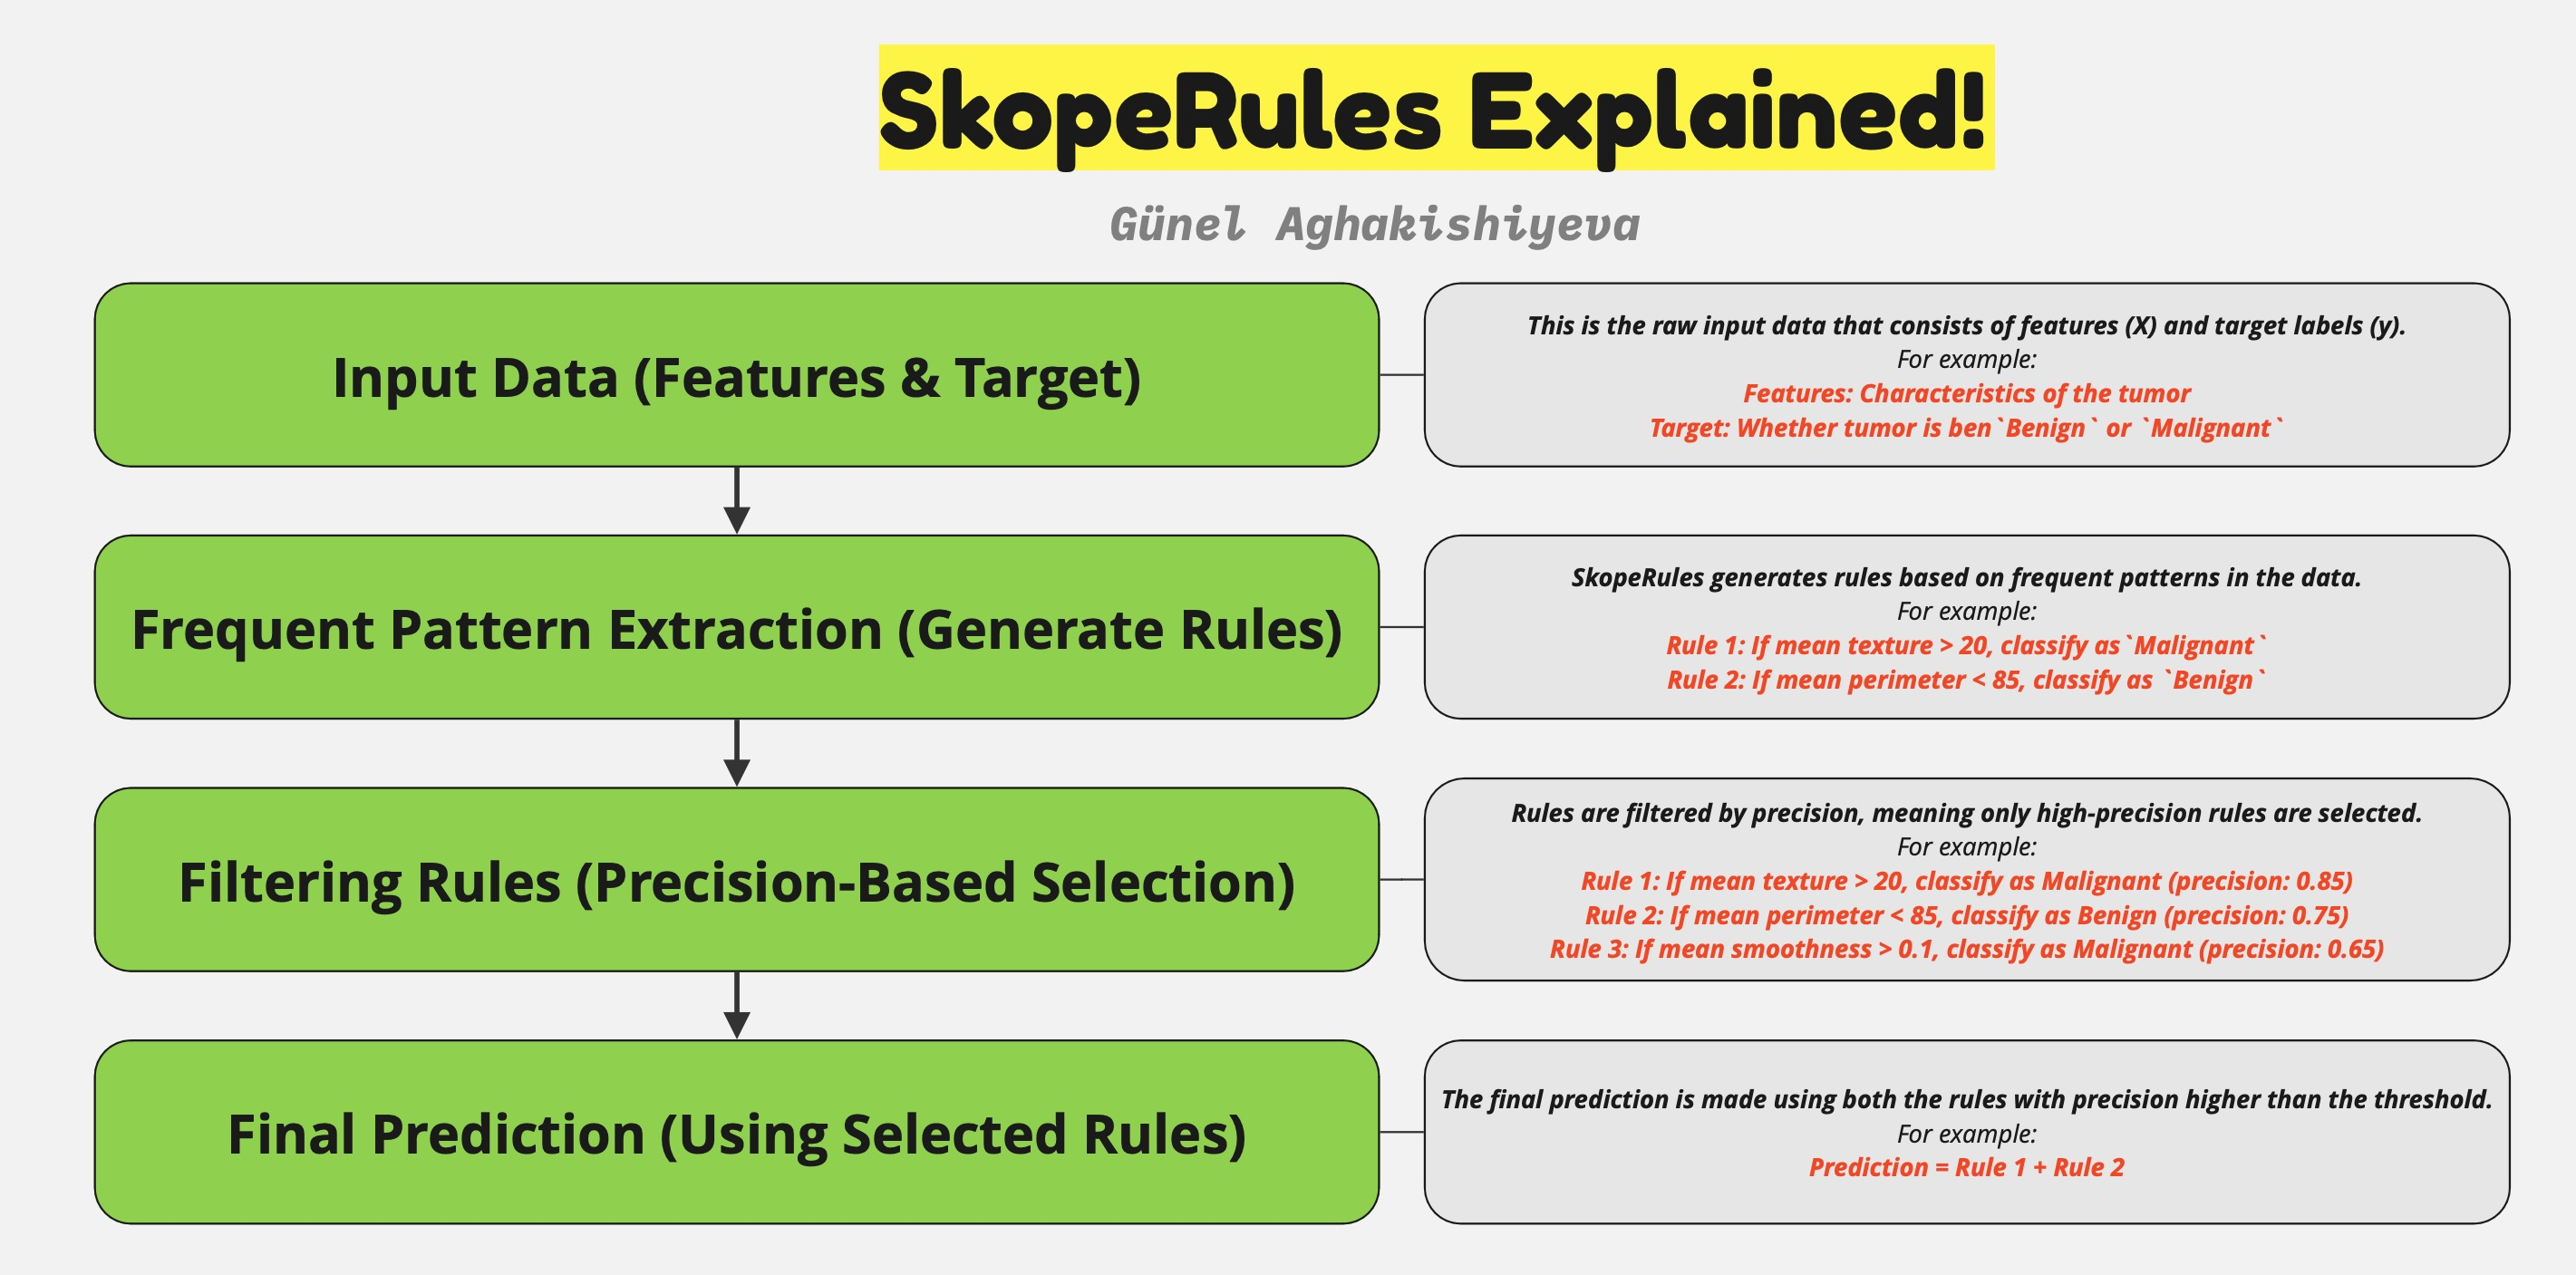

We instantiate the `SkopeRulesClassifier` model and fit it to the training data.

In [ ]:
# Instantiate and fit the SkopeRulesClassifier model
skoperules_model = SkopeRulesClassifier()
skoperules_model.fit(X_train, y_train)

SkopeRulesClassifier()

We use the trained `SkopeRulesClassifier` to predict the target class for both the validation and test datasets. We then evaluate the model's performance using various metrics:
- **Precision, Recall, and F1-Score** for each class
- **Overall accuracy**

In [ ]:
# Predict on validation and test sets
y_val_pred = skoperules_model.predict(X_val)
y_test_pred = skoperules_model.predict(X_test)

In [ ]:
# Print the classification report
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        36
           1       0.96      0.87      0.91        55

    accuracy                           0.90        91
   macro avg       0.89      0.91      0.90        91
weighted avg       0.91      0.90      0.90        91



In [ ]:
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



We extract the **top 5 rules** generated by the `SkopeRulesClassifier` model.

In [ ]:
# Extract and print the top rules
rules = skoperules_model.rules_[0:5]  # Get the top 5 rules
print("Top 5 Important Rules:")
for idx, rule in enumerate(rules, 1):
    print(f"Rule {idx}: {rule}")

Top 5 Important Rules:
Rule 1: X13 <= 0.7207 and X20 <= 0.13947 and X7 <= 0.09102
Rule 2: X20 <= 0.32796 and X27 <= 0.44177 and X28 > -2.01572
Rule 3: X23 <= 0.15241 and X28 > -1.96958 and X7 <= 0.08413
Rule 4: X23 <= 0.1577 and X27 <= 0.44177 and X9 > -1.15985
Rule 5: X13 <= 1.00432 and X20 <= 0.12393 and X27 <= 0.43043


# OneR

**OneRClassifier is a simple, interpretable rule-based algorithm that generates a single rule based on one feature. It selects the feature that produces the most accurate prediction by finding the best threshold (cutoff) for classification. While simple, OneR often performs surprisingly well on many datasets, making it a great choice when interpretability is essential. By focusing on one feature, OneRClassifier builds a highly interpretable model with easy-to-understand decision rules.**

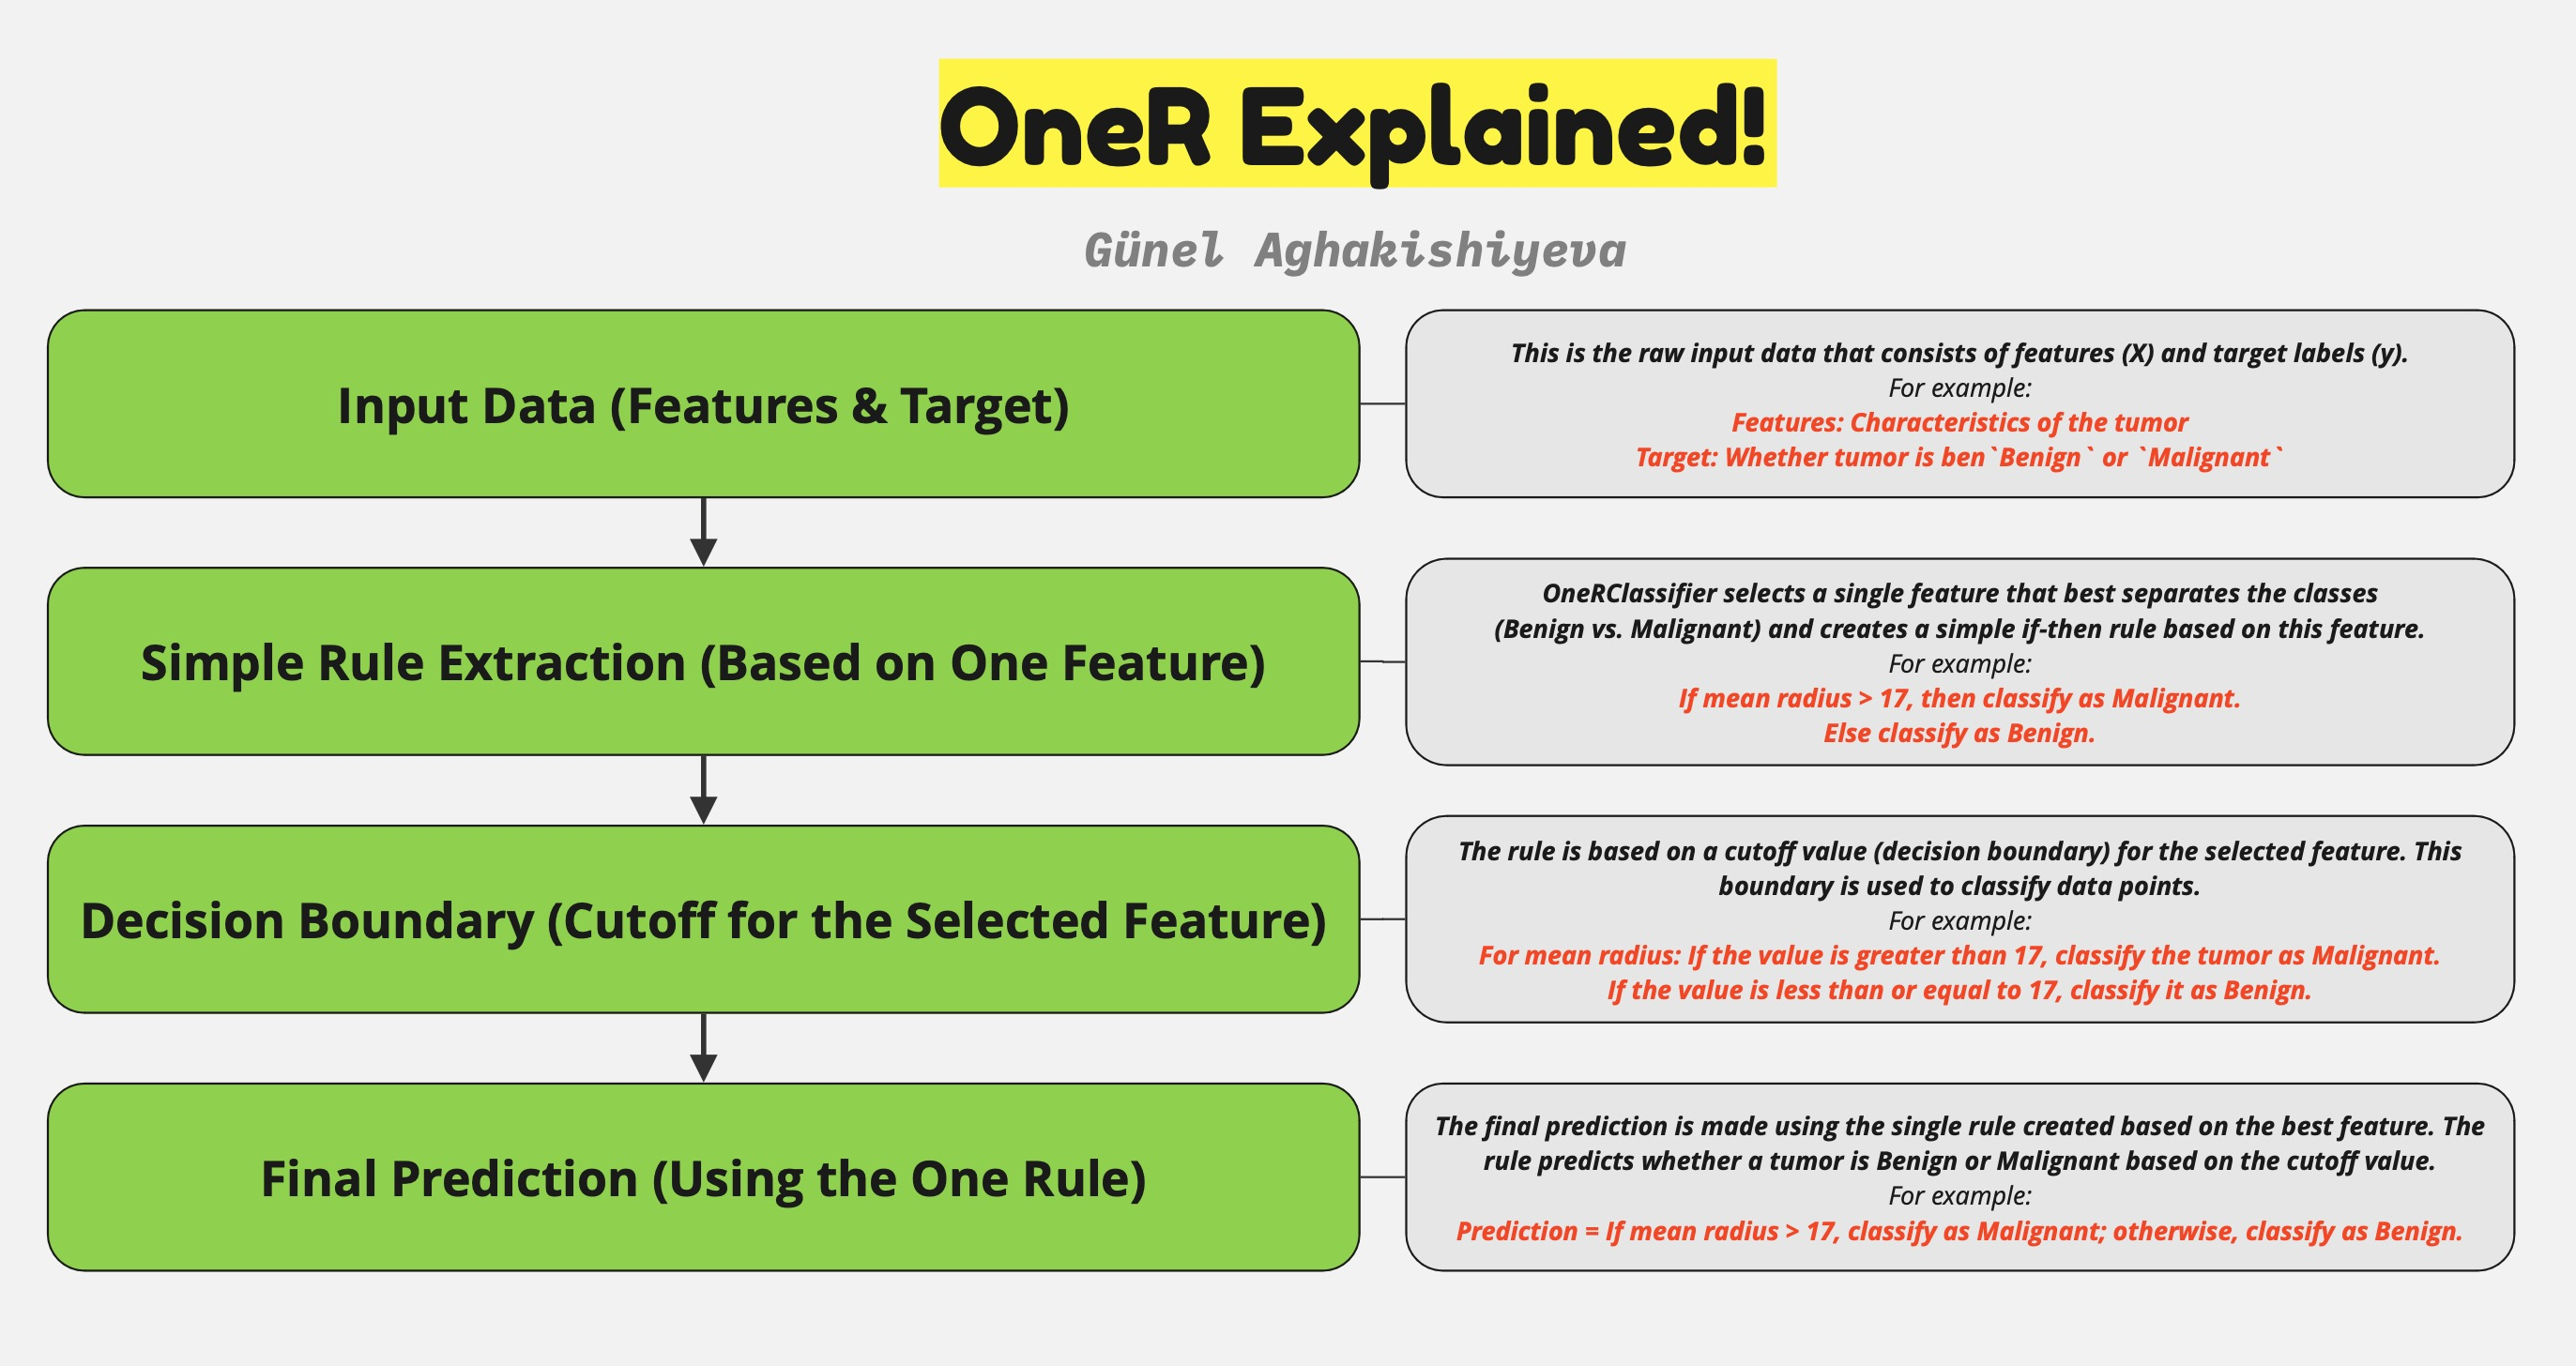

We instantiate and fit the `OneRClassifier` to the training data.

In [ ]:
# Instantiate and fit the OneRClassifier
oneR_model = OneRClassifier()
oneR_model.fit(X_train, y_train)

OneRClassifier()

Here, we use the trained `OneRClassifier` to make predictions on both the validation and test sets.

In [ ]:
# Predict on validation and test sets
y_val_pred = oneR_model.predict(X_val)
y_test_pred = oneR_model.predict(X_test)

We use the trained `OneRClassifier` to predict the target class for both the validation and test datasets. We then evaluate the model's performance using various metrics:
- **Precision, Recall, and F1-Score** for each class
- **Overall accuracy**

In [ ]:
# Print the classification report
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        36
           1       0.91      0.91      0.91        55

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



In [ ]:
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.91      0.96      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



We extract the top rules generated by the `OneRClassifier`. The rules are based on a single feature and a threshold that separates the two classes. These rules provide a clear, interpretable decision boundary, explaining how the model classifies instances based on the feature values.

In [ ]:
# Print the top rules
print("Top Rules:")
for idx, rule in enumerate(oneR_model.rules_):
    if 'index_col' in rule and 'cutoff' in rule:
        feature_idx = rule['index_col']
        threshold = rule['cutoff']
        rule_description = f"Rule {idx + 1}: If {feature_names[feature_idx]} > {threshold:.2f}, predict class 1, else predict class 0"
        print(rule_description)

Top Rules:
Rule 1: If worst concave points > 0.44, predict class 1, else predict class 0
Rule 2: If worst concave points > 0.54, predict class 1, else predict class 0
Rule 3: If worst concave points > 0.67, predict class 1, else predict class 0
